Welcome to the Octagon Oracle, a machine learning project designed to predict the winner of UFC fights. Using a dataset containing various features such as grappling statistics, striking statistics, control time, fight outcomes, and method of victory, we aim to develop a predictive model with an accuracy greater than 90%. The project involves:

Data preprocessing: Handling missing values, encoding categorical features, and capping outliers.
Data splitting: Dividing the dataset into training and test sets.
Data balancing: Applying SMOTE to balance the dataset.
Model training: Using a RandomForestClassifier to train the model.
Model evaluation: Assessing the model's performance and ensuring it meets the accuracy goal.
By the end of this project, you'll have a trained RandomForestClassifier model and a detailed report on its performance, ready to forecast the winners of UFC fights with high accuracy. Let's dive into the Octagon and start predicting!

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Load your dataset
df = pd.read_csv('/content/UFC_DATA.csv')

In [ ]:
suffixes =['R_Round1_TIP_Back Control Time',
           'R_Round1_TIP_Clinch Time', 'R_Round1_TIP_Control Time',
           'R_Round1_TIP_Distance Time', 'R_Round1_TIP_Ground Control Time',
           'R_Round1_TIP_Ground Time', 'R_Round1_TIP_Guard Control Time',
           'R_Round1_TIP_Half Guard Control Time', 'R_Round1_TIP_Misc. Ground Control Time',
           'R_Round1_TIP_Mount Control Time', 'R_Round1_TIP_Neutral Time',
           'R_Round1_TIP_Side Control Time', 'R_Round1_TIP_Standing Time',
           'R_Round1_Strikes_Knock Down_Landed']

#Loop through each round and drop the columns with the specified suffixes
for i in range(1, 6):
    drop_cols = [f'R_Round{i}_{suffix}' for suffix in suffixes if not suffix.startswith('R_Round')] # Remove 'R_Round' prefix from suffixes
    df.drop(columns=drop_cols, inplace=True, errors='ignore') # Ignore errors if columns don't exist
    drop_cols = [f'B_Round{i}_{suffix}' for suffix in suffixes if not suffix.startswith('R_Round')] # Remove 'R_Round' prefix from suffixes
    df.drop(columns=drop_cols, inplace=True, errors='ignore') # Ignore errors if columns don't exist

In [ ]:
additional_drop_cols = ['B_HomeTown', 'B_ID', 'B_Location', 'R_Home Town', 'R_ID', 'R_Location',
                        'Date', 'Event_ID', 'Fight_ID', 'BPrev', 'RPrev','BStreak',
                        'Last_round', 'Max_round','B_Name', 'R_HomeTown', 'R_Name']
df.drop(columns=additional_drop_cols, inplace=True, errors='ignore')

In [ ]:
df = df[(df['B_Height'] != 0) | (df['B_Height'] != 0)]

In [ ]:
df['B_Age'] = df['B_Age'].fillna(np.mean(df['B_Age']))
df['B_Height'] = df['B_Height'].fillna(np.mean(df['B_Height']))
df['R_Age'] = df['R_Age'].fillna(np.mean(df['R_Age']))
df['R_Height'] = df['R_Height'].fillna(np.mean(df['R_Height']))

In [ ]:
df.describe(include=[np.number])

,B_Age,B_Height,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,Blue_Strike_Accuracy_Ratio,Red_Strike_Accuracy_Ratio,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,...,R__Round5_TIP_Distance Time,R__Round5_TIP_Ground Control Time,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time
count,2318.000000,2318.000000,2318.00000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,...,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000,2318.000000
mean,31.776184,177.327249,73.69948,0.074681,1.103825,0.577413,0.410267,0.572476,3.852459,1.657559,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
std,4.149959,8.775249,15.38535,0.257653,1.296262,0.884792,0.491988,0.494826,4.434978,2.059837,...,67.324777,25.812677,34.249053,8.786229,4.442889,4.364841,13.346887,68.126168,7.135585,76.612971
min,20.000000,152.000000,52.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,29.000000,172.000000,61.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
50%,31.776184,177.000000,70.00000,0.000000,1.000000,0.577413,0.000000,1.000000,3.852459,1.657559,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
75%,35.000000,182.000000,84.00000,0.074681,1.103825,0.577413,1.000000,1.000000,4.000000,1.914390,...,251.411111,33.644444,64.903704,6.855556,3.977778,4.303704,12.011111,262.740741,4.381481,303.103704
max,48.000000,213.000000,120.00000,3.000000,13.000000,8.000000,1.000000,1.000000,47.000000,20.000000,...,1259.000000,633.000000,666.000000,144.000000,91.000000,62.000000,273.000000,1291.000000,200.000000,1473.000000


In [ ]:
# Check for missing values
print(df.isnull().sum())

# Impute missing values for numerical columns
numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    df[column].fillna(df[column].median(), inplace=True)
# Impute missing values for categorical columns (if any)
categorical_columns = df.select_dtypes(include=[object]).columns
for column in categorical_columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

B_Age                                      0
B_Height                                   0
B_Weight                                   0
B__Round1_Grappling_Reversals_Landed       0
B__Round1_Grappling_Standups_Landed        0
                                          ..
R__Round5_TIP_Misc. Ground Control Time    0
R__Round5_TIP_Mount Control Time           0
R__Round5_TIP_Neutral Time                 0
R__Round5_TIP_Side Control Time            0
R__Round5_TIP_Standing Time                0
Length: 880, dtype: int64


In [ ]:
# Check again for missing values to confirm they are handled
print(df.isnull().sum())

B_Age                                      0
B_Height                                   0
B_Weight                                   0
B__Round1_Grappling_Reversals_Landed       0
B__Round1_Grappling_Standups_Landed        0
                                          ..
R__Round5_TIP_Misc. Ground Control Time    0
R__Round5_TIP_Mount Control Time           0
R__Round5_TIP_Neutral Time                 0
R__Round5_TIP_Side Control Time            0
R__Round5_TIP_Standing Time                0
Length: 880, dtype: int64


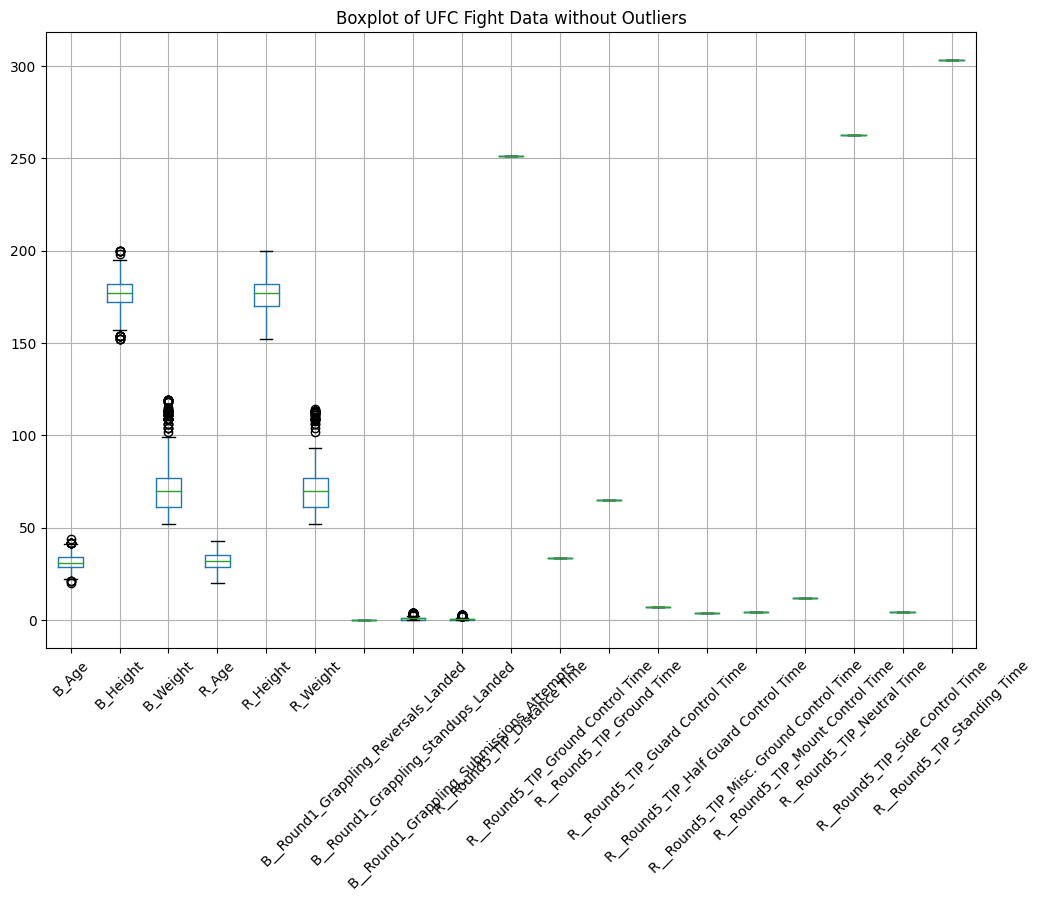

Number of outliers per column:
B_Age: 6
B_Height: 4
B_Weight: 36
R_Age: 6
R_Height: 3
R_Weight: 48
B__Round1_Grappling_Reversals_Landed: 105
B__Round1_Grappling_Standups_Landed: 53
B__Round1_Grappling_Submissions_Attempts: 36
R__Round5_TIP_Distance Time: 66
R__Round5_TIP_Ground Control Time: 15
R__Round5_TIP_Ground Time: 101
R__Round5_TIP_Guard Control Time: 21
R__Round5_TIP_Half Guard Control Time: 3
R__Round5_TIP_Misc. Ground Control Time: 0
R__Round5_TIP_Mount Control Time: 0
R__Round5_TIP_Neutral Time: 0
R__Round5_TIP_Side Control Time: 0
R__Round5_TIP_Standing Time: 0


In [ ]:
# Define the columns that contain numerical variables
numerical_columns = [
    'B_Age', 'B_Height', 'B_Weight', 'R_Age', 'R_Height', 'R_Weight',
   'B__Round1_Grappling_Reversals_Landed',
    'B__Round1_Grappling_Standups_Landed', 'B__Round1_Grappling_Submissions_Attempts',
    'R__Round5_TIP_Distance Time', 'R__Round5_TIP_Ground Control Time',
    'R__Round5_TIP_Ground Time', 'R__Round5_TIP_Guard Control Time',
    'R__Round5_TIP_Half Guard Control Time',  'R__Round5_TIP_Misc. Ground Control Time',
    'R__Round5_TIP_Mount Control Time', 'R__Round5_TIP_Neutral Time',
    'R__Round5_TIP_Side Control Time', 'R__Round5_TIP_Standing Time' ]

# Define the threshold for identifying outliers
outlier_threshold = 3

# Step 1: Remove outliers
outliers_count = {}
for column in numerical_columns:
    # Check if column exists in DataFrame before proceeding
    if column in df.columns:
        z_scores = (df[column] - df[column].mean()) / df[column].std()
        outliers = np.abs(z_scores) > outlier_threshold
        df = df[~outliers]
        outliers_count[column] = outliers.sum()
    else:
        print(f"Warning: Column '{column}' not found in DataFrame.")


plt.figure(figsize=(12, 8))
df[numerical_columns].boxplot()
plt.title('Boxplot of UFC Fight Data without Outliers')
plt.xticks(rotation=45)
plt.show()

print("Number of outliers per column:")
for column, count in outliers_count.items():
    print(f"{column}: {count}")

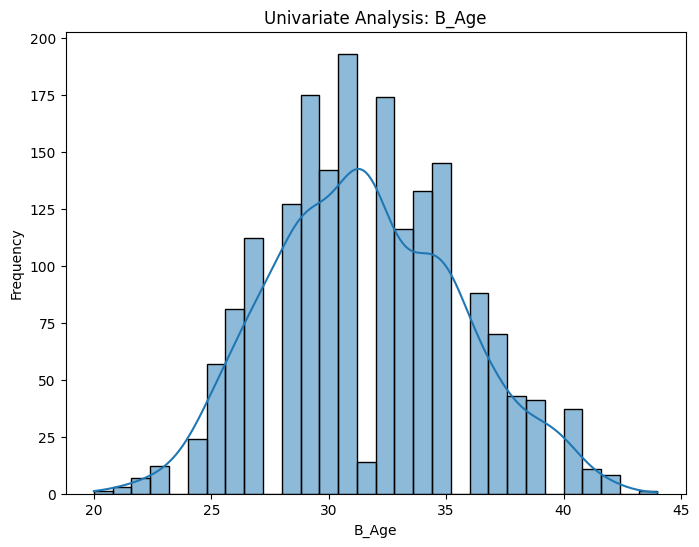

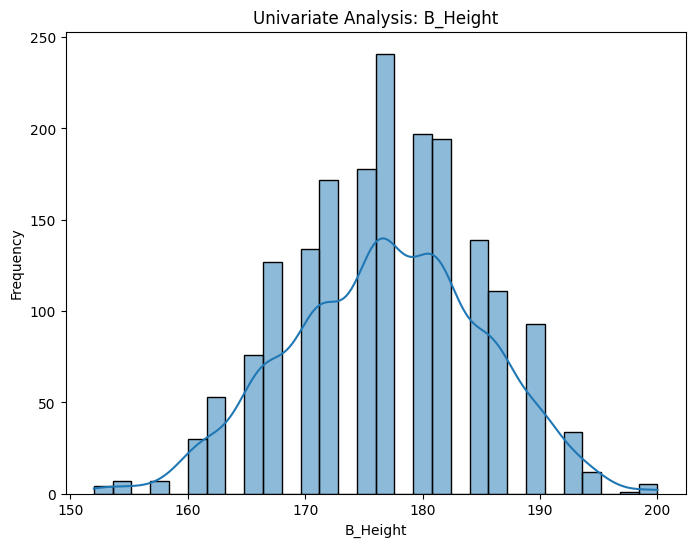

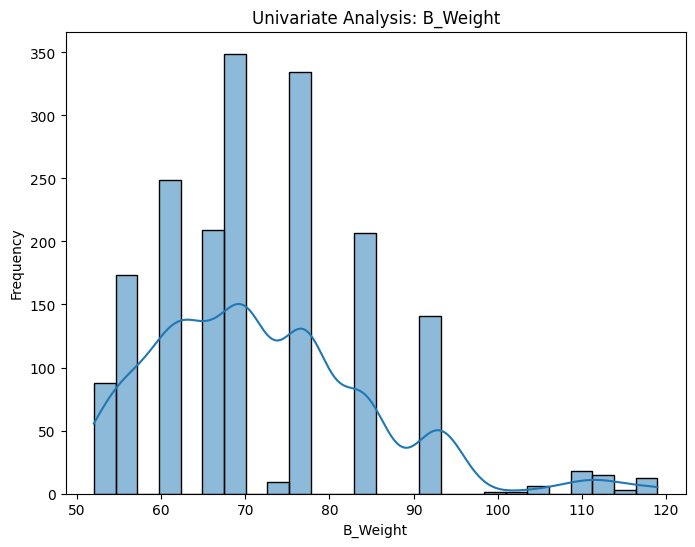

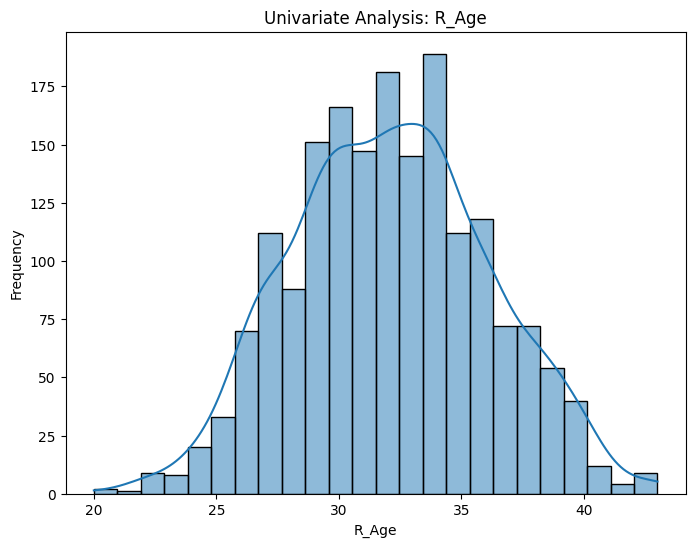

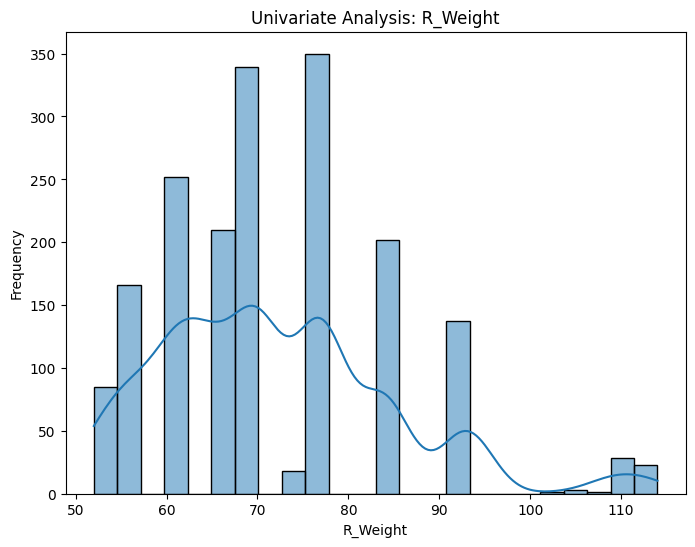

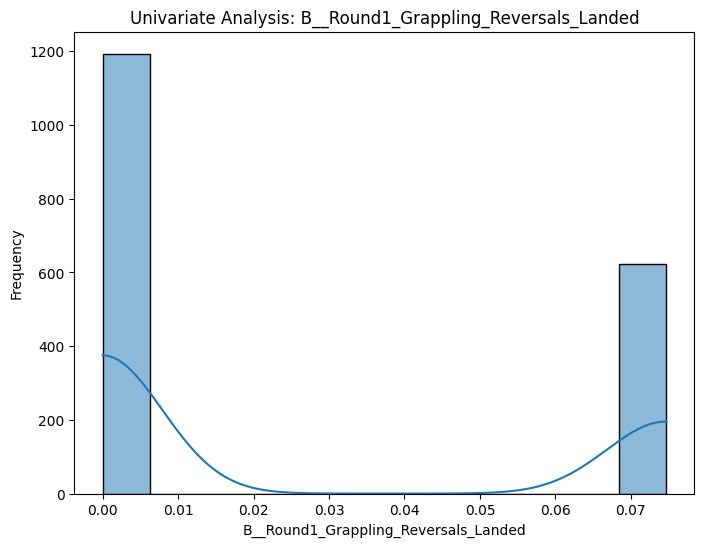

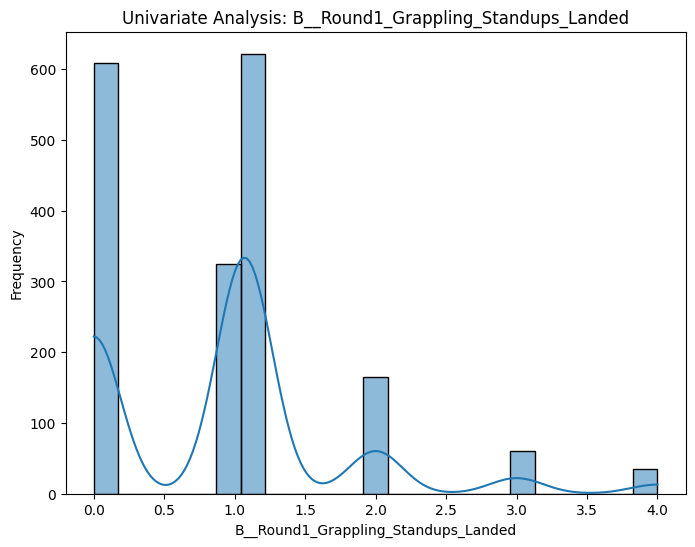

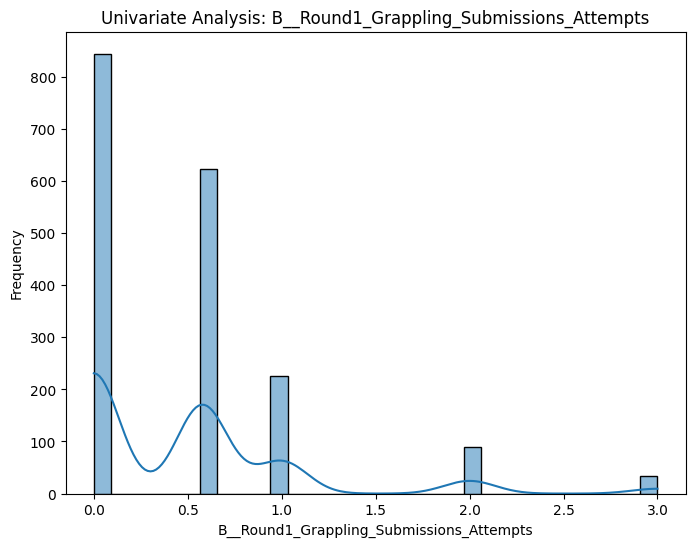

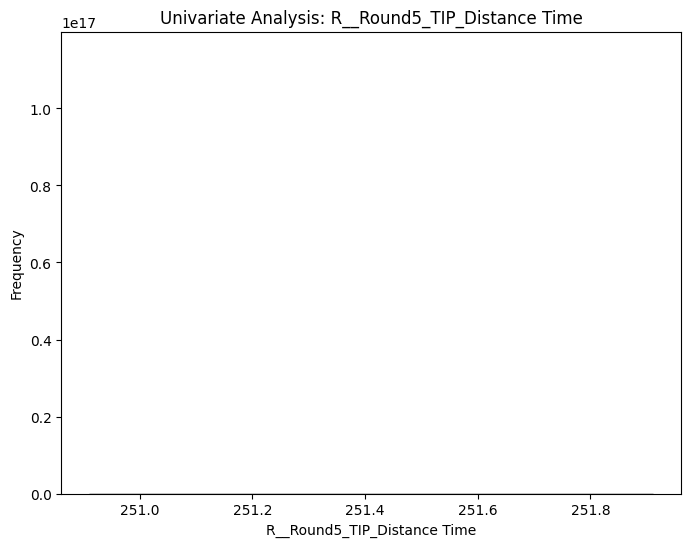

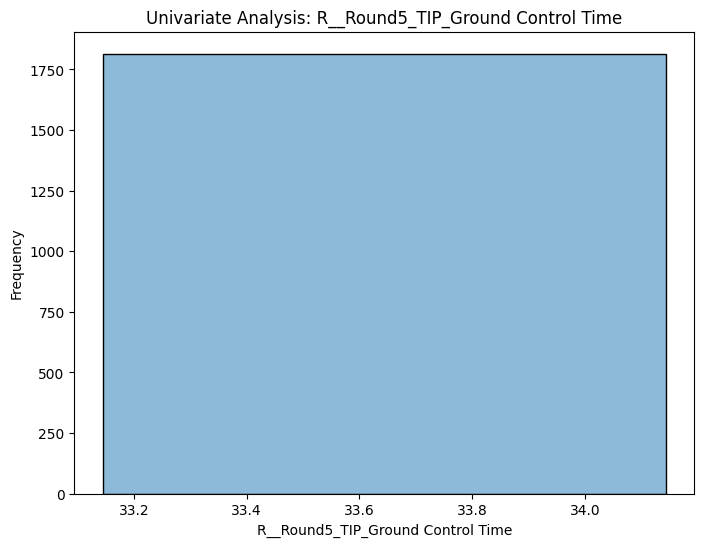

In [ ]:
# Define the columns for univariate analysis
columns = ['B_Age', 'B_Height', 'B_Weight', 'R_Age','R_Weight',
           'B__Round1_Grappling_Reversals_Landed', 'B__Round1_Grappling_Standups_Landed',
           'B__Round1_Grappling_Submissions_Attempts','R__Round5_TIP_Distance Time',
           'R__Round5_TIP_Ground Control Time'
           ]

#Perform univariate analysis for each column
for column in columns:
    # Indent the code block within the for loop
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], kde=True)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.title(f'Univariate Analysis: {column}') # Use f-string for formatting
    plt.show()

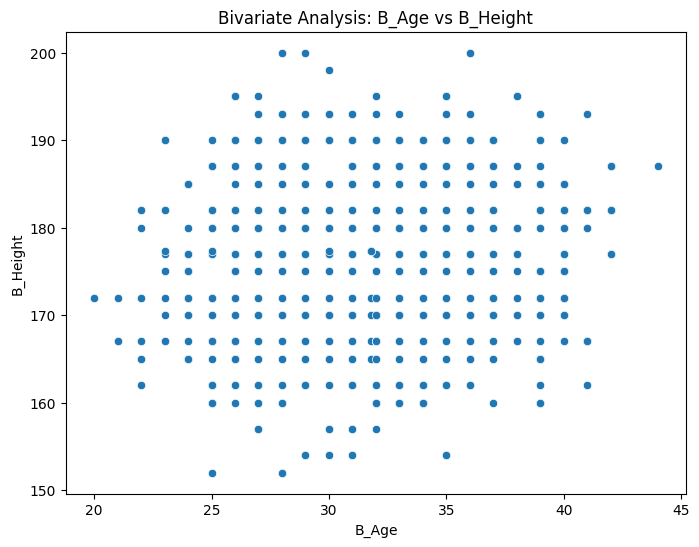

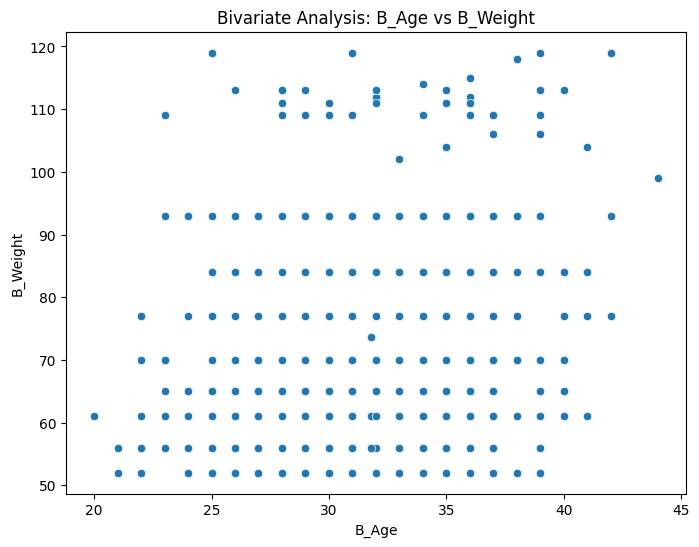

In [ ]:
# Define the pairs of columns for bivariate analysis
pairs_of_columns = [
    ('B_Age', 'B_Height'),
    ('B_Age', 'B_Weight')
]

# Perform bivariate analysis for the specified pairs of columns
for column1, column2 in pairs_of_columns:
    if not pd.api.types.is_numeric_dtype(df[column1]) or not pd.api.types.is_numeric_dtype(df[column2]):
        continue

    # Create scatter plot for the pair of columns
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x=column1, y=column2, data=df)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'Bivariate Analysis: {column1} vs {column2}')
    plt.show()


In [ ]:
# Function to cap outliers
def cap_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])
    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])

    # Apply to all numerical columns
    for column in numerical_columns:
        cap_outliers(df, column)


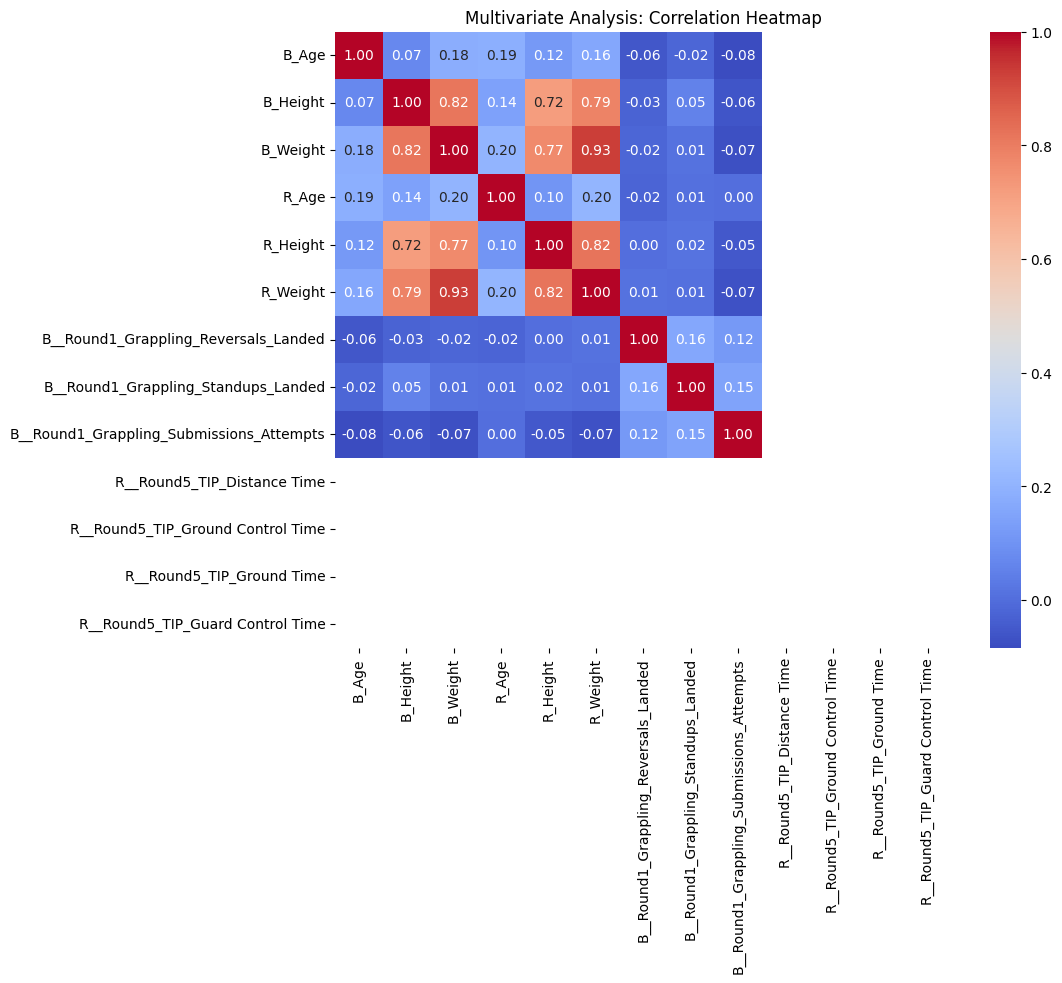

In [ ]:
# Select the relevant columns for multivariate analysis

columns = ['B_Age', 'B_Height', 'B_Weight', 'R_Age', 'R_Height', 'R_Weight',
           'B__Round1_Grappling_Reversals_Landed','B__Round1_Grappling_Standups_Landed',
           'B__Round1_Grappling_Submissions_Attempts','R__Round5_TIP_Distance Time',
           'R__Round5_TIP_Ground Control Time','R__Round5_TIP_Ground Time', 'R__Round5_TIP_Guard Control Time']

# Create a correlation matrix

correlation_matrix = df[columns].corr()

# Generate a heatmap to visualize the correlation matrix

plt.figure(figsize=(10, 8))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Multivariate Analysis: Correlation Heatmap')

plt.show()

In [ ]:
# Encode categorical columns
label_encoders = {}
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

    # Splitting features and target
X = df.drop(columns=['winner'])  # Replace 'winner' with your target column
y = df['winner']  # Replace 'winner' with your target column

# Encode the target column if it is categorical
if y.dtype == 'object':
    le = LabelEncoder()
    y = le.fit_transform(y)
    label_encoders['winner'] = le


In [ ]:
# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Applying SMOTE to balance the dataset
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print(f"Original dataset shape: {Counter(y_train)}")
print(f"Balanced dataset shape: {Counter(y_train_balanced)}")


Original dataset shape: Counter({3: 815, 0: 608, 2: 16, 1: 13})
Balanced dataset shape: Counter({0: 815, 3: 815, 2: 815, 1: 815})


In [ ]:
# Building the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Making predictions
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming y_test and y_pred are already defined
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Classification report
report = classification_report(y_test, y_pred)
print("Classification Report:\n", report)

Accuracy: 99.45%
Confusion Matrix:
[[146   0   0   0]
 [  1   0   1   0]
 [  0   0   1   0]
 [  0   0   0 214]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       146
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00       214

    accuracy                           0.99       363
   macro avg       0.62      0.75      0.67       363
weighted avg       0.99      0.99      0.99       363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined
# Train Decision Tree model
dt = DecisionTreeClassifier(random_state=0)
dt.fit(X_train, y_train)

# Predict on test set
y_pred_dt = dt.predict(X_test)

In [ ]:
# Calculate accuracy
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f"Test Accuracy of Decision Tree classifier: {accuracy_dt * 100:.2f}%")

# Calculate confusion matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("Confusion Matrix for Decision Tree classifier:")
print(cm_dt)

# Classification report
report_dt = classification_report(y_test, y_pred_dt)
print("Classification Report for Decision Tree classifier:\n", report_dt)


Test Accuracy of Decision Tree classifier: 99.72%
Confusion Matrix for Decision Tree classifier:
[[146   0   0   0]
 [  0   1   1   0]
 [  0   0   1   0]
 [  0   0   0 214]]
Classification Report for Decision Tree classifier:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       146
           1       1.00      0.50      0.67         2
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00       214

    accuracy                           1.00       363
   macro avg       0.88      0.88      0.83       363
weighted avg       1.00      1.00      1.00       363



In [ ]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
   'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Create the RandomForestClassifier
rf = RandomForestClassifier(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                   n_iter=25, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Perform the search on the balanced training data
random_search.fit(X_train_balanced, y_train_balanced)

Fitting 3 folds for each of 25 candidates, totalling 75 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [50, 100, 200]},
                   random_state=42, verbose=2)

In [ ]:
# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best accuracy found: ", random_search.best_score_)

# Use the best estimator to make predictions on the test set
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Calculate accuracy
accuracy_best_rf = accuracy_score(y_test, y_pred_best_rf)
print(f"Accuracy of the best Random Forest: {accuracy_best_rf * 100:.2f}%")

# Confusion matrix
cm_best_rf = confusion_matrix(y_test, y_pred_best_rf)
print("Confusion Matrix for the best Random Forest:")
print(cm_best_rf)

# Classification report
report_best_rf = classification_report(y_test, y_pred_best_rf)
print("Classification Report for the best Random Forest:\n", report_best_rf)

Best parameters found:  {'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 20}
Best accuracy found:  0.9923277102065088
Accuracy of the best Random Forest: 99.17%
Confusion Matrix for the best Random Forest:
[[146   0   0   0]
 [  0   0   1   1]
 [  0   0   1   0]
 [  1   0   0 213]]
Classification Report for the best Random Forest:
               precision    recall  f1-score   support

           0       0.99      1.00      1.00       146
           1       0.00      0.00      0.00         2
           2       0.50      1.00      0.67         1
           3       1.00      1.00      1.00       214

    accuracy                           0.99       363
   macro avg       0.62      0.75      0.66       363
weighted avg       0.99      0.99      0.99       363



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


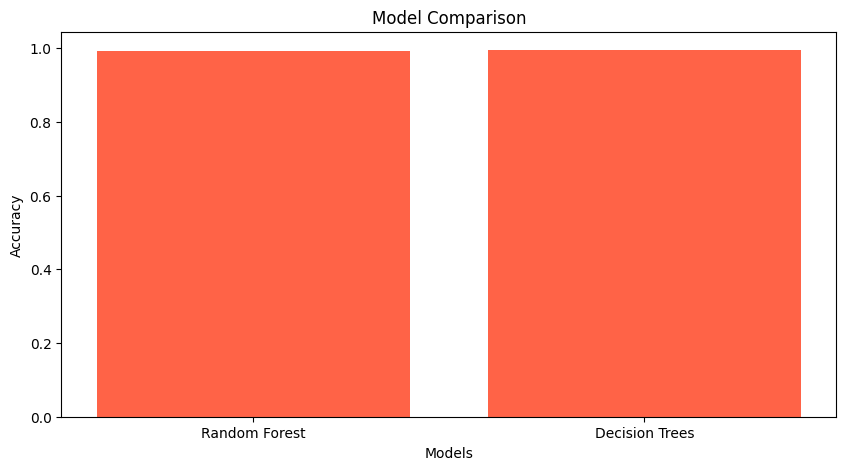

In [ ]:
import matplotlib.pyplot as plt

# Example accuracy values for demonstration
accuracy_rf = 0.9923
accuracy_dt = 0.9947

# List of models and their accuracies
models = ['Random Forest', 'Decision Trees']
accuracies = [accuracy_rf, accuracy_dt]

# Plot the bar graph
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='tomato')

# Add title and axis labels
plt.title('Model Comparison')
plt.xlabel('Models')
plt.ylabel('Accuracy')

# Display the plot
plt.show()

In [ ]:
import joblib

classifier = joblib.dump(model, 'model.pkl')